<a href="https://colab.research.google.com/github/ajitaravind/Colpali-RAG-Demo/blob/main/ColPali_Vision_based_RAG_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup


In [ ]:
!pip install byaldi
!sudo apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git qwen-vl-utils flash-attn optimum auto-gptq bitsandbytes

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.1/407.1 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.3 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata


In [ ]:
import base64
import os
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')# to download the ColPali model
from byaldi import RAGMultiModalModel

In [ ]:
RAG = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2", verbose=1)


Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

### Download any pdf document that text, images and tables

### Indexing

In [ ]:
RAG.index(
    input_path="/content/Hyundai Kona Electric.pdf",
    index_name="attention",
    store_collection_with_index=True,
    overwrite=True
)

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Index exported to .byaldi/attention
Index exported to .byaldi/attention


{0: '/content/Hyundai Kona Electric.pdf'}

In [ ]:
RAG.index

<bound method RAGMultiModalModel.index of <byaldi.RAGModel.RAGMultiModalModel object at 0x78d9414e6fe0>>

### Query the documents

In [ ]:
query = "What is the battery capacity of Kona Electric SE?"


In [ ]:
query1= "What is the battery capacity of Kona Electric Limited?"

In [ ]:
results = RAG.search(query1, k=1)

In [ ]:
results

[{'doc_id': 0, 'page_num': 4, 'score': 15.5625, 'metadata': {}, 'base64': 'iVBORw0KGgoAAAANSUhEUgAAEkUAAAZ2CAIAAACES4FNAAEAAElEQVR4nOzdeWAkZZ038Oepqu5Op3PfydwHwxzMyD3DfSqILooMuKy74AWiLB7wiresF4qCqyKKgIquisC4qCsIqONwzQHDOTdzJpnJJJM76bOO53n/qO5Kpa6u7nSSTvL9vL5sUl3HU9XdVb/U/H71o5xzAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMM6EyR4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADMCKhnAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAiYB6NgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmAioZwMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgImAejYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJgIqGcDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICJgHo2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYCKhnAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAiYB6NgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmAioZwMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgImAejYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJgIqGcDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICJgHo2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACYCKhnAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAiYB6NgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmAioZwMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgImAejYAAAAAAAAAAAAAAAAAAAAAAAAAA

### Actual image data

In [ ]:
image_bytes = base64.b64decode(results[0].base64)


In [ ]:
filename = '/content/image.jpg'
with open(filename, 'wb') as f:
  f.write(image_bytes)

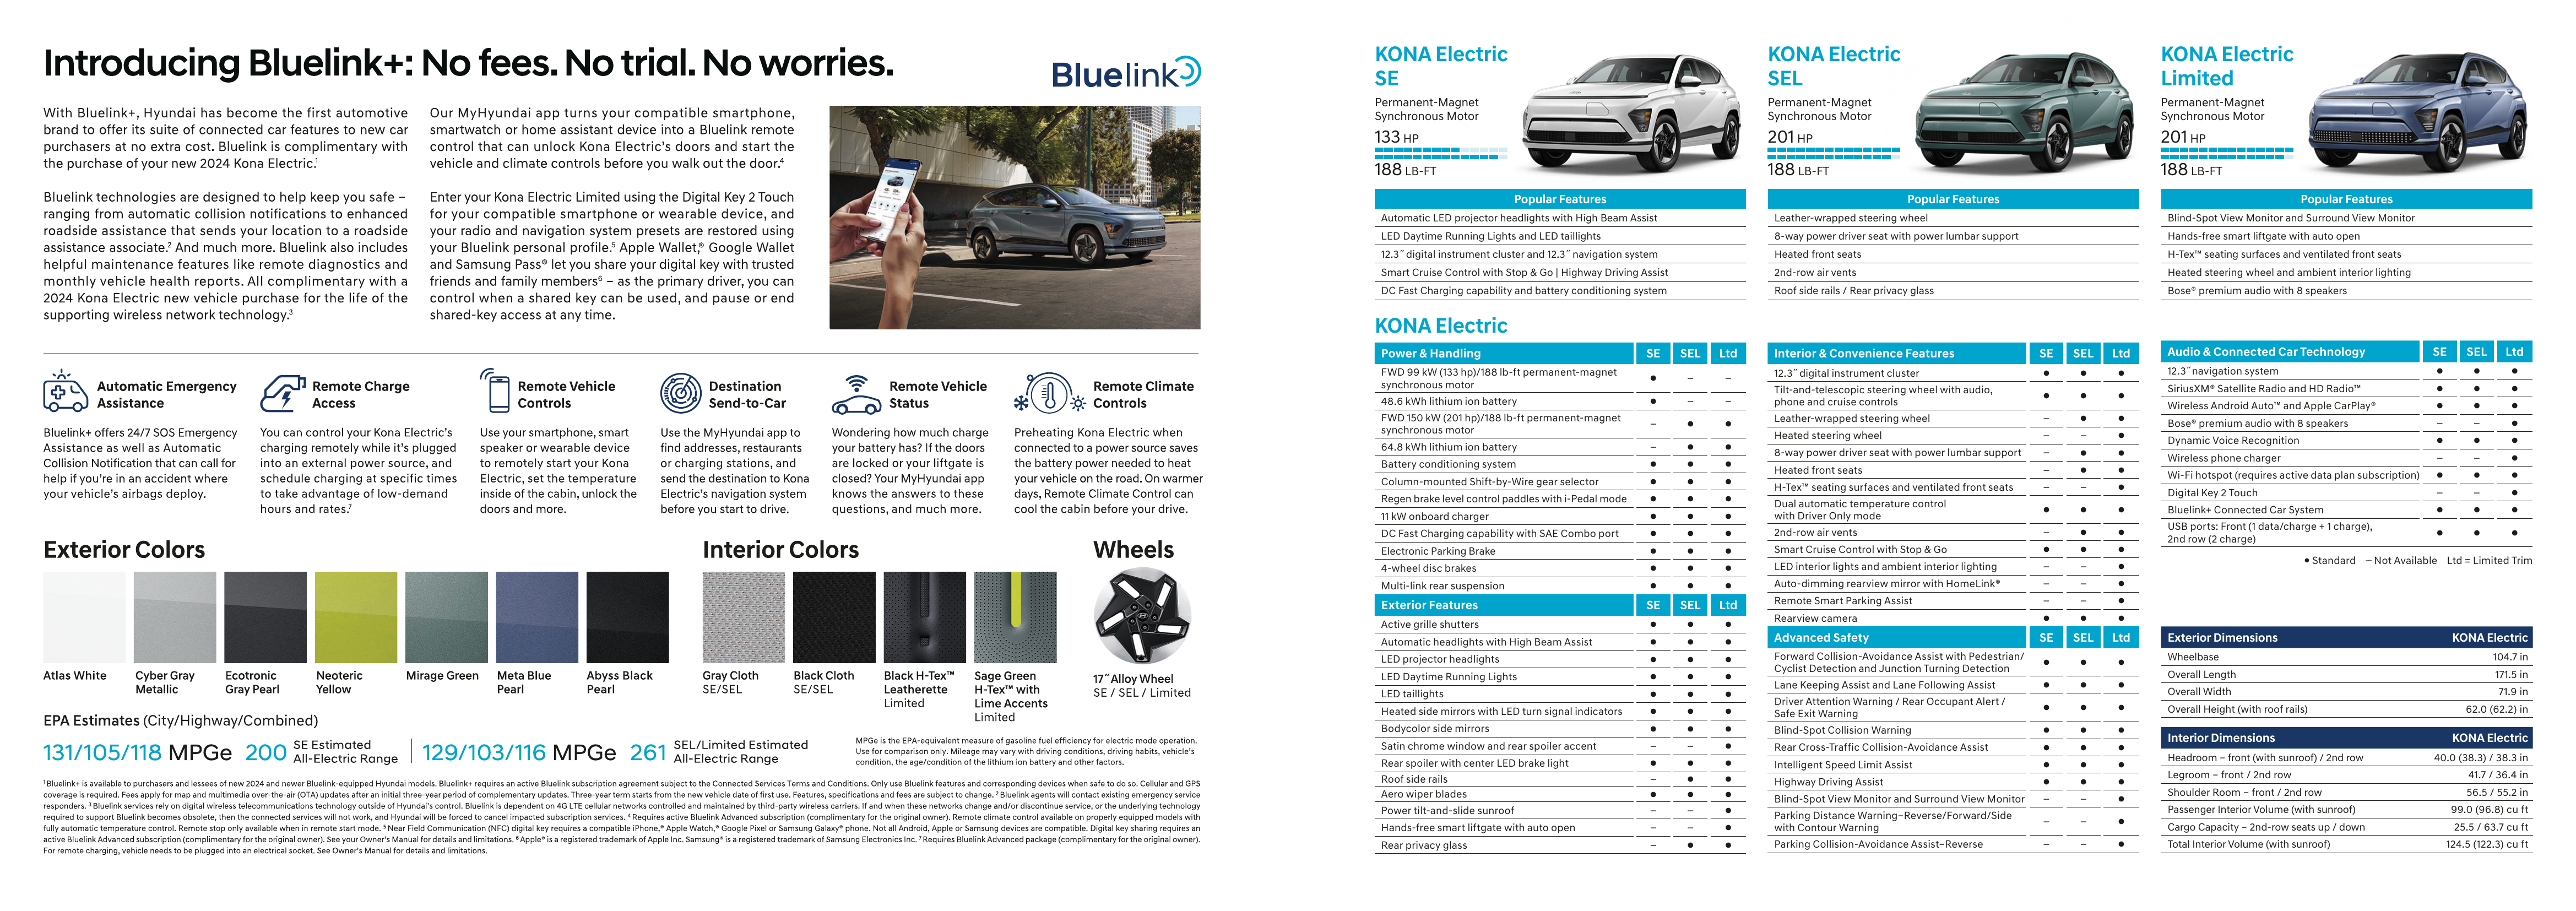

In [ ]:
from IPython.display import Image

display(Image(filename))

Send the image to a vision language model(Gemini)

In [ ]:
from google.oauth2 import service_account
import vertexai
from vertexai.generative_models import GenerativeModel,Part
# Path to your service account key file
key_path = '/content/<give your services json key>'

# Create credentials object
credentials = service_account.Credentials.from_service_account_file(key_path)

# Initialize Vertex AI
vertexai.init(project='<your project name', location='us-central1', credentials=credentials)

In [ ]:
model = GenerativeModel("gemini-1.5-flash-001")

In [ ]:
image_file_path = "/content/image.jpg"
with open(image_file_path, "rb") as f:
    image_data = f.read()

In [ ]:
image_file = Part.from_data(data=image_data, mime_type="image/png")

In [ ]:
response = model.generate_content([image_file,query1])
print(response.text)

The Kona Electric Limited has a 64.8 kWh lithium ion battery.
